# Zillow's Data Bootcamp Report

### Group: Jonathan Chadi, Vijay Das, Andrew Kosturos

### Notebook Outline:

For our project we used data exclusively from Zillow. Zillow provides real estate rental and sales data for the United States. Throughout our data collection and analysis, we chose to analyze data on the country wide. We believe that analyzing America will reflect relationships between different indicators in the real estate market while removing the impact of idiosyncratic events that can occur on a local level. For example New York City is a dense city that has been a hub for finance whereas New Orleans is comprised of neighborhoods that suffered extensive levels of damage during Hurricane Katrina. Therefore analyzing the entire USA should remove the economic impacts of these random events. Within this constraint we used measures including median sales price/ sqft, rent/ sqft, negative equity, foreclosures adjusted by number of homes in a region, age of inventory, and the median price reduction. We used a Jupyter Notebook to read the CSVs and clean the data. After this step is completed, we will begin to create analysis using Pandas, Matplotlib, Ploty, and Seaborn.

## Import Packages

In [1]:
import sys                             
import pandas as pd                    
import matplotlib.pyplot as plt          
import datetime as dt                  
import numpy as np                     
import seaborn.apionly as sns          
from pandas_datareader import wb, data as web  


from plotly.offline import iplot, iplot_mpl  
import plotly.graph_objs as go               
import plotly                                
import cufflinks as cf                       
cf.set_config_file(offline=True, offline_show_link=False)

import scipy as scipy
from scipy import stats
from scipy.stats import mstats
from scipy.stats.mstats import gmean
import matplotlib.patches as mpatches


%matplotlib inline             
plotly.offline.init_notebook_mode(connected=True)


print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Plotly version: ', plotly.__version__)
print('Today: ', dt.date.today())

/Users/sglyon/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Python version: 3.5.2 |Anaconda 4.2.0 (x86_64)| (default, Jul  2 2016, 17:52:12) 
[GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
Pandas version:  0.19.0
Plotly version:  1.12.11
Today:  2016-12-22


# Data Set Analysis/Cleanup

 The next six code boxes consist of pulling Median Sale Price data, Negative Equity Data, Home Foreclosed per 10,000, Median Price Cut (%), Rent/Sq Ft, and Inventory Age data for further analysis and charting. 

## Median Sold Price

In [2]:
#Median Sold Price
url1 = 'http://files.zillowstatic.com/research/public/'
url2 = 'Metro/Metro_MedianSoldPrice_AllHomes.csv' # Url Download Address of Data Source
url  = url1 + url2        # location of file

sale_price = pd.read_csv(url)     # read file and assign it to df_saleprice

sale_price = sale_price.drop(['RegionID', 'SizeRank'], axis=1) # Here we dropped the given 'RegionID', which the source used
sale_price = sale_price.set_index('RegionName')
sale_price = sale_price.groupby(pd.PeriodIndex(sale_price.columns, freq='Q'), axis=1).mean()
sale_price3 = sale_price.T
sale_price3 = sale_price3['United States']
sale_price3 = sale_price3.to_frame('United States')
sale_price3.tail(10)

United States
2014Q1  182057.650000
2014Q2  192457.916667
2014Q3  198811.333333
2014Q4  191050.000000
2015Q1  189916.666667
2015Q2  205333.333333
2015Q3  212425.000000
2015Q4  207325.000000
2016Q1  204516.666667
2016Q2  222658.333333

## Negative Equity

In [3]:
# Negative Equity

url3 = 'http://files.zillowstatic.com/research/public/NegativeEquity_2016Q2_Public.csv'
neg_equity = pd.read_csv(url3)

neg_equity = neg_equity[(neg_equity.RegionType == 'Metro') | 
                 (neg_equity.RegionType == 'Country')]

# Here, there were several region types outside of metro region
# We this code to remove any regional definitions except for 'Metro' and 'Country'

neg_equity = neg_equity.drop(['RegionID','RegionType','StateRegionID',
                                            'StateName','MSARegionID','MSA',
                                            'CountyRegionID','CountyName','CityRegionID',
                                            'City', 'SizeRank'], axis=1)

neg_equity = neg_equity.set_index('RegionName') # this is to set our index = RegionName

## Homes Foreclosed per 10k homes

In [4]:
# Homes Foreclosed per 10k homes

url4 = 'http://files.zillowstatic.com/research/public/Metro/'
url5 = 'Metro_HomesSoldAsForeclosures-Ratio_AllHomes.csv'
url4 = url4 + url5

foreclosure = pd.read_csv(url4)

#Because we got our data from a centralized source, we could use the same cleanup techniques

foreclosure = foreclosure.drop(['RegionID','SizeRank'], axis=1) # Here we dropped the given 'RegionID', which the source used
foreclosure = foreclosure.set_index('RegionName') # We wanted to set the index equal to the population size of metro areas
foreclosure = foreclosure.groupby(pd.PeriodIndex(foreclosure.columns, freq='Q'), axis=1).mean()

## Median Price Cut (%)

In [5]:
#Median Price Cut (%)

url5 = 'http://files.zillowstatic.com/research/public/Metro/Metro_'
url6 = 'MedianPctOfPriceReduction_AllHomes.csv'
url7 = url5 + url6

price_cut = pd.read_csv(url4)

# Because we got our data from a centralized source, we could use the same cleanup techniques
price_cut = price_cut.drop(['RegionID','SizeRank'], axis=1) # Here we dropped the given 'RegionID', which the source used
price_cut = price_cut.set_index('RegionName') # We wanted to set the index equal to the population size of metro areas
price_cut = price_cut.groupby(pd.PeriodIndex(price_cut.columns, freq='Q'), axis=1).mean()

## Rent/Sq. Foot

In [6]:
url6 = 'http://files.zillowstatic.com/research/public/Metro/Metro_ZriPerSqft_AllHomes.csv'
rent = pd.read_csv(url6)

rent = rent.set_index('RegionName')
rent = rent.drop(['RegionID','SizeRank'], axis = 1) # data clean up
rent = rent.groupby(pd.PeriodIndex(rent.columns, freq='Q'), axis=1).mean()

## Inventory Age

In [7]:
urlinv = 'http://files.zillowstatic.com/research/public/Metro/AgeOfInventory_Metro_Public.csv'
inv_age = pd.read_csv(urlinv)

inv_age = inv_age.drop(['RegionType','StateFullName','DataTypeDescription',],axis=1)
inv_age = inv_age.set_index('RegionName')
inv_age = inv_age.groupby(pd.PeriodIndex(inv_age.columns, freq='Q'), axis=1).mean()

## Calculating percentage change

In analyzing the data, we realized that the units were different for different data frames. Sales Price is measured in dollars, while negative equity data is listed as a percentage of total homes. Furthermore, inventory age is listed as a time period in months. The best way to standardize this was to get percentage changes in the data, and we therefore used a Pandas method called pct.change() to calculate this from a Series pulled from a data frame. The series pulled from all the dataframes is for the United States as a whole. 

In [8]:
sp_change = sale_price.T
sp_change = sp_change['United States']
sp_change = 100* sp_change.pct_change()

ne_change = neg_equity.T
ne_change = ne_change['United States']
ne_change = 100* ne_change.pct_change()

f_change = foreclosure.T
f_change = f_change['United States']
f_change = 100* f_change.pct_change()

rent_change = rent.T
rent_change = rent_change['United States']
rent_change.head(5)
rent_change = 100* rent_change.pct_change()

ia_change = inv_age.T
ia_change = ia_change['United States']
ia_change.head(5)
ia_change = 100* ia_change.pct_change()

## Sale Price Data for all U.S. Metro Areas

This matplotlib plot consists of sales price data for every major United States metropolitan area. We were able to do this becaue using plt.subplots() every variable on a transposed sale_price data frame was plotted. Figure size, colors, labels, and titles were also set. This allows us to a macro time series analysis of median sales prices for all types of homes. The types of homes includes are single family residences of all room numbers, condominiums, and co-ops.

We wanted to take a look to see how much sale prices have increased across the US and see specifically how much it has changed within some of the biggest metro regions in the United States.

In [9]:
spq = sale_price.T

fig, ax = plt.subplots()
spq.plot(ax=ax, 
         figsize=(9,9),
         legend=True,
         color='blue', alpha=0.3, 
         ylim=(0,800000)
        )
ax.set_ylabel('Average Sale Price')
ax.set_xlabel('')
ax.set_title('Sale Price Over Time', fontsize=14, loc='left')
spq['San Francisco, CA'].plot(ax=ax, color='magenta', linewidth=2, alpha=3)
spq['New York, NY'].plot(ax=ax, color='green', linewidth=2, alpha = 3)
spq['Chicago, IL'].plot(ax=ax, color='red', linewidth=2, alpha = 3)
spq['Boston, MA'].plot(ax=ax, color='orange', linewidth=2, alpha = 3)
spq['United States'].plot(ax=ax, color='black', linewidth=2, alpha = 3)

sf_patch = mpatches.Patch(color='magenta', label='San Francisco, CA')
ny_patch = mpatches.Patch(color='green', label='New York, NY')
chi_patch = mpatches.Patch(color='red', label='Chicago, IL')
bos_patch = mpatches.Patch(color='orange', label='Boston, MA')
us_patch = mpatches.Patch(color='black', label='United States')
plt.legend(handles=[sf_patch, ny_patch, bos_patch, chi_patch, us_patch], loc=0)





By looking at this graph, we can noted a couple of things. First the absolute increase in sale price seems to have affected different regions very differently and the indicator of this does not seem to be determined by the size of the metropolitan area, as noted by the difference between SF and Chicago. We wanted to look more into these trends in the change in sale price, so we constructed a means to view this change.

## Plot Quadrants with Foreclosure Rate and Sale Price Metrics

We found it important to juxtapose certain metrics in a quadrant like system. Viewing the first column of the quadrant system vertically, we can see a correlation between Foreclosure Rate per 10K homes for the United States as a whole, and Median Sales Prices. What is of particular significance is the rapid rise in Foreclosure Rates during the U.S. housing crisisd and the steep drop in median sales prices during that time period. It is important to note that Foreclosure Rates were rising over a year before the recession officially started, as can be seen in the Percent Change in Median Foreclosure Rate quadrant. 

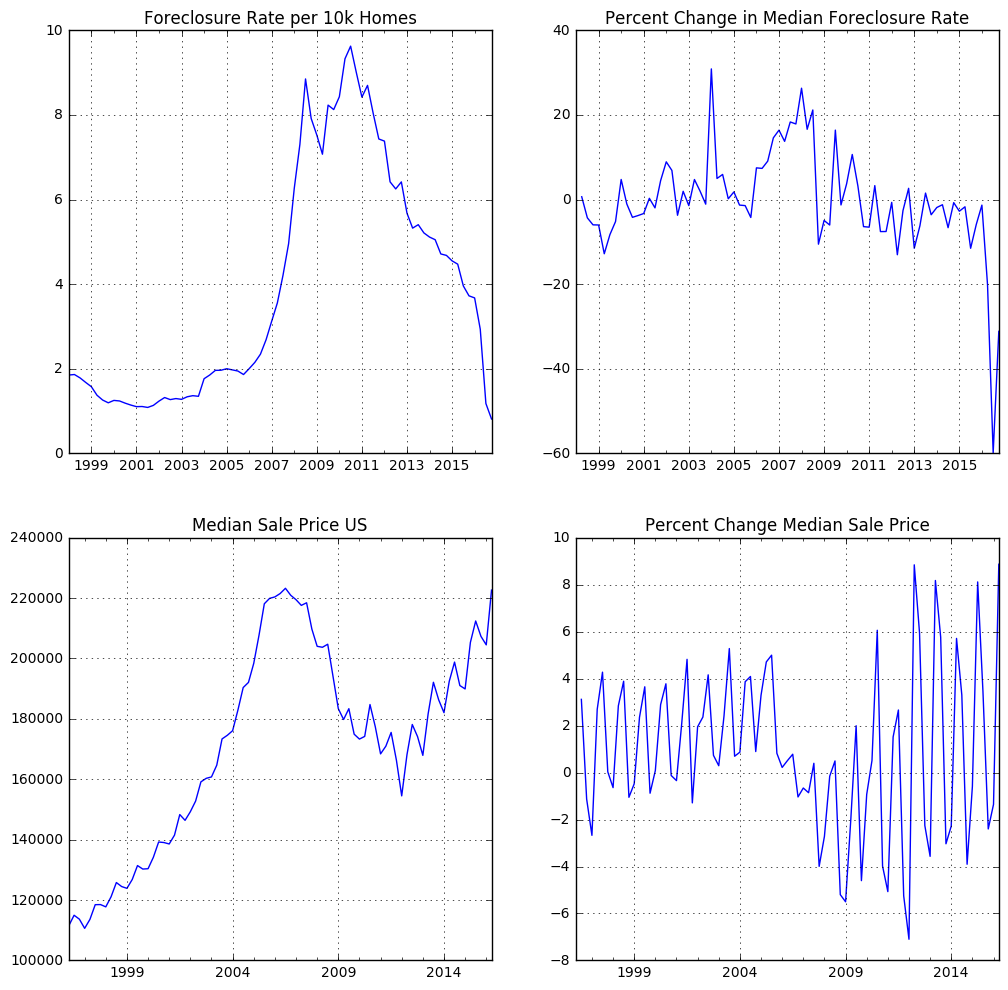

In [10]:
sale_price2 = sale_price.T
foreclosure2 = foreclosure.T
fig, ax = plt.subplots(2,2)
fig.set_size_inches(12,12)
sp_change.plot(ax = ax[1,1], grid = True)
sale_price2['United States'].plot(ax = ax[1,0], grid = True)
foreclosure2['United States'].plot(ax = ax[0,0], grid = True)
f_change.plot(ax = ax[0,1], grid = True)

ax[0, 0].set_title('Foreclosure Rate per 10k Homes')
ax[1, 0].set_title('Median Sale Price US')
ax[1, 1].set_title('Percent Change Median Sale Price')
ax[0, 1].set_title('Percent Change in Median Foreclosure Rate')


## Comparison of Percentage Change in Inventory Age and Percentage Change in Median Price Cut

While the plot can show the median price cut decreasing with the seasonality of inventory age, median price cut does not experience the same upswings every year as inventory age. Therefore, median price cut can be experiencing a stronger correlation to the strength of the overall housing market. The median price cut is decreasing from 2012 through 2016 matching rising home values during that time period. This may be attributed to buyers’ and sellers’ perception of future prices. If the overall sentiment is rising home values then buyers should have a higher willingness to pay and sellers should not cut the price as much due to an expectation of a higher price in the future.


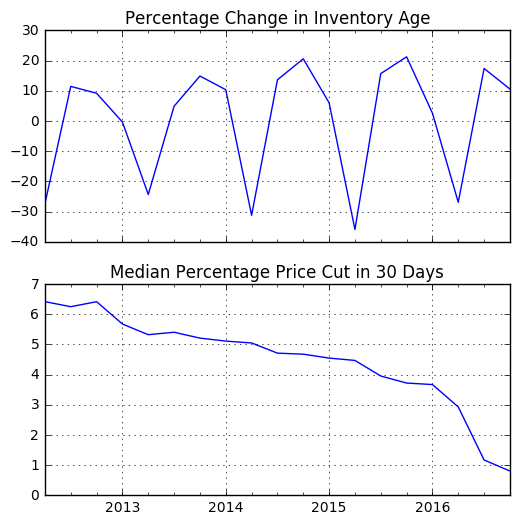

In [11]:
price_cut2 = price_cut.T
price_cut2 = price_cut2[57:]
fig, ax = plt.subplots(2, sharex = True)
fig.set_size_inches(6,6)
ia_change.plot(ax = ax[0], grid = True)
price_cut2['United States'].plot(ax = ax[1], grid = True)

ax[0].set_title('Percentage Change in Inventory Age')
ax[1].set_title('Median Percentage Price Cut in 30 Days')

## Plot Quadrants with Negative Equity and Foreclosure Rate Metrics

We found it necessary to juxtapose Negative Equity data with Foreclosure Rate data. Because Negative Equity was a percentage rate, and foreclosures were set as a portion of 10,000 homes, the common unit on the right side of the quandrant system is percent change in negative equity rate and percent change in foreclosure rates. On a microeconomic level, we believed that as less people owed more on their homes than what the homes were worth (negative equity), that would decrease the probability of owners walking away or being unable to stay in their homes. Data from 2011 to 2016 does show that as negative equity rates have declined during the economic recovery, foreclosure rates per 10,000 homes have also declined. 

In [12]:
neg_equity2 = neg_equity.T
foreclosure2 = foreclosure.T
foreclosure2 = foreclosure2[53:]
f_change2 = f_change[53:]

fig, ax = plt.subplots(2,2)
fig.set_size_inches(12,12)
ne_change.plot(ax = ax[0,1], grid = True)
neg_equity2['United States'].plot(ax = ax[0,0], grid = True)
foreclosure2['United States'].plot(ax = ax[1,0], grid = True)
f_change2.plot(ax = ax[1,1], grid = True)

ax[0, 0].set_title('Median Negative Equity Rate')
ax[1, 0].set_title('Foreclosure Rate per 10K Homes')
ax[1, 1].set_title('Percent Change in Foreclosure Rate')
ax[0, 1].set_title('Percent Change in Negative Equity')


# Merging Dataframes for Analysis

In [13]:
sp16Q2 = sale_price.xs("2016Q2", axis=1)
ne16Q2 = neg_equity.xs("2016Q2", axis=1)
fc16Q2 = foreclosure.xs("2016Q2", axis=1)
mpc16Q2 = price_cut.xs("2016Q2", axis=1)
rent16Q2 = rent.xs("2016Q2", axis=1)
ia16Q2 = inv_age.xs("2016Q2", axis=1)

In [14]:
Q2_2016 = pd.concat([sp16Q2, ne16Q2, fc16Q2, mpc16Q2, rent16Q2, ia16Q2 ], axis=1)
Q2_2016.columns = ['Sale Price', 'Negative Equity', 'Foreclosures', 'Median Price Cut', 'Rent', 'Inventory Age']
print(Q2_2016.shape)
Q2_2016.head(5)

(897, 6)


Sale Price  Negative Equity  Foreclosures  Median Price Cut  \
Aberdeen, WA         NaN         0.160366           NaN               NaN   
Abilene, TX          NaN         0.100802           NaN               NaN   
Ada, OK              NaN         0.148288           NaN               NaN   
Adrian, MI           NaN         0.146487           NaN               NaN   
Akron, OH      136281.15         0.126528      2.922067          2.922067   

                  Rent  Inventory Age  
Aberdeen, WA  0.676000      66.666667  
Abilene, TX   0.691333            NaN  
Ada, OK       0.636667      70.333333  
Adrian, MI    0.722667      78.000000  
Akron, OH     0.809333            NaN

In [15]:
Q2_2016 = Q2_2016.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False) #drops NA Values
Q2_2016.head(5)

Sale Price  Negative Equity  Foreclosures  \
Albany, NY         193983.333333         0.109790      4.549833   
Allentown, PA      171961.666667         0.144797      2.750733   
Atlantic City, NJ  178150.000000         0.293752      6.564933   
Bakersfield, CA    203083.333333         0.173201      4.256367   
Baltimore, MD      279835.666667         0.167095      7.397867   

                   Median Price Cut      Rent  Inventory Age  
Albany, NY                 4.549833  1.068000      71.666667  
Allentown, PA              2.750733  0.904000      71.333333  
Atlantic City, NJ          6.564933  1.074667     116.000000  
Bakersfield, CA            4.256367  0.866000      51.000000  
Baltimore, MD              7.397867  1.215333      57.666667

# Data Analysis

In [16]:
spdelta = spq.T.max(axis=1)-spq.T.min(axis=1)
spq.head(5)

RegionName  United States   New York, NY  Los Angeles-Long Beach-Anaheim, CA  \
1996Q2      111491.666667  157600.000000                                 NaN   
1996Q3      114966.666667  164916.666667                                 NaN   
1996Q4      113669.166667  160383.333333                                 NaN   
1997Q1      110630.833333  159064.666667                                 NaN   
1997Q2      113611.033333  160414.666667                                 NaN   

RegionName    Chicago, IL  Dallas-Fort Worth, TX  Philadelphia, PA  \
1996Q2      137058.333333          109193.333333     109857.333333   
1996Q3      142716.666667          111237.500000     117650.000000   
1996Q4      136550.000000          109887.000000     116816.666667   
1997Q1      133558.333333           93177.483333     107683.333333   
1997Q2      136058.333333           97900.150000     113171.666667   

RegionName  Washington, DC  Miami-Fort Lauderdale, FL    Atlanta, GA  \
1996Q2       157551.416667               96750.000000  105483.333333   
1996Q3       163215.000000              100641.666667  109366.666667   
1996Q4       158181.666667              100858.333333  108955.000000   
1997Q1       160463.583333               92383.333333  109858.333333   
1997Q2       158101.416667               91233.333333  111786.666667   

RegionName     Boston, MA    ...      Ludington, MI  Weatherford, OK  \
1996Q2      148783.333333    ...                NaN              NaN   
1996Q3      155833.333333    ...                NaN              NaN   
1996Q4      148908.333333    ...                NaN              NaN   
1997Q1      149896.666667    ...                NaN              NaN   
1997Q2      156766.666667    ...                NaN              NaN   

RegionName  The Dalles, OR  Steamboat Springs, CO  Parsons, KS  Othello, WA  \
1996Q2                 NaN                    NaN   26614.7059          NaN   
1996Q3                 NaN                    NaN   28898.7500          NaN   
1996Q4                 NaN                    NaN   19500.0000          NaN   
1997Q1                 NaN                    NaN   21307.6923          NaN   
1997Q2                 NaN                    NaN   19563.2353          NaN   

RegionName  Fairfield, IA  Vineyard Haven, MA  Winnemucca, NV  Craig, CO  
1996Q2                NaN                 NaN             NaN        NaN  
1996Q3                NaN                 NaN             NaN        NaN  
1996Q4                NaN                 NaN             NaN        NaN  
1997Q1                NaN                 NaN             NaN        NaN  
1997Q2                NaN                 NaN             NaN        NaN  

[5 rows x 205 columns]

Because the data that we had did not have data points for every metro area, we decided that the best way to approach our analysis was by looking at the difference between the maximum recorded average price and the minimum recorded average price to test the volatility of the regions. We can see that in the set, the average change over the 20 year sample size was an absolute change of 132,364 dollars, would occur either during the home equity bubble or in the present day, depending on the city. The 25th and 75th percentile fluctuate by about 100,000 dollars, indicating a relatively large range given the mean of the sample.



In [17]:
spdelta.describe()

count       205.000000
mean     132364.794095
std      104095.721850
min           0.000000
25%       60195.833333
50%      105711.666667
75%      169850.000000
max      647200.000000
dtype: float64

As we can see better visually here, most metro areas rose between, $0-$200,000 during the sample. What is surprising however is just how much the max end of the range has changed over this period, and we wanted to look more into what the biggest rising areas were.

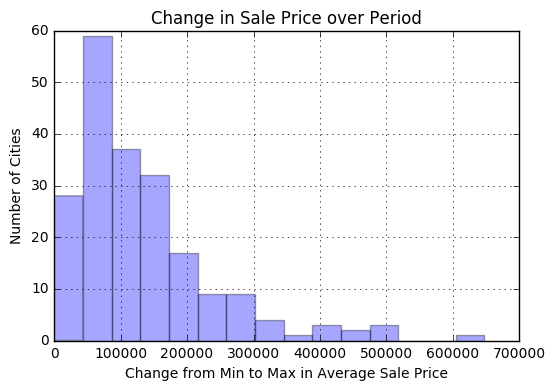

In [18]:
fig, ax = plt.subplots()
spdelta.hist(bins=15, ax=ax, alpha=0.35)
ax.set_xlabel('Change from Min to Max in Average Sale Price')
ax.set_ylabel('Number of Cities')
ax.set_title('Change in Sale Price over Period')

ymin, ymax = ax.get_ylim()

In [19]:
spdelta.sort_values(ascending=False)[:20]

RegionName
San Jose, CA           647200.000000
San Francisco, CA      504350.000000
Santa Cruz, CA         491516.666667
Kapaa, HI              477166.666667
Napa, CA               438291.666667
Salinas, CA            433700.000000
Kahului, HI            430340.683333
Ventura, CA            412600.000000
San Luis Obispo, CA    391591.666667
Santa Rosa, CA         372583.333333
San Diego, CA          342633.333333
Hilo, HI               322948.516667
Vallejo, CA            319094.000000
Stockton, CA           313507.800000
Stamford, CT           297193.116667
Riverside, CA          292766.666667
Sacramento, CA         281216.666667
Merced, CA             278783.333333
New York, NY           270083.333333
Modesto, CA            270066.666667
dtype: float64

We can see here that among the top 20 of the highest rising metro areas in terms of average sale price, that California and Hawaii both had the areas with the greatest appreciation in terms of home values. It appears as though the end of our distribution is not concentrated within large metro areas, as we found out earlier, but instead are based in by location. Potential of some interest, Silicon Valley/San Francisco metro areas have seen their sale prices rising more than twice that of New York from their minimum to the maximum over the time period of the data set.



# Graph Analysis

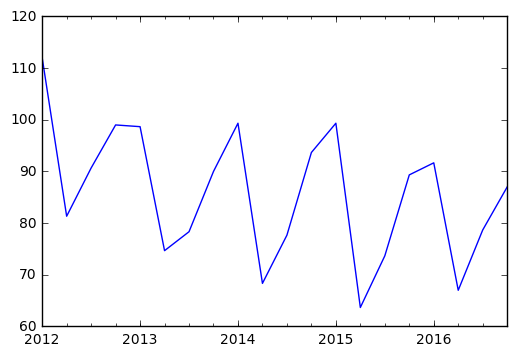

In [20]:
inv_age2 = inv_age
inv_age2.head(5)
inv_age2 = inv_age2.T
inv_age2['United States'].plot()

The average age of a first time home buyer in the US is 33. On average women give birth to their first child at age 26 and men father their first child at age 27. Being a parent with school age children can create a friction and added consideration to moving. Therefore, we believe there is a correlation between the American public school calendar and home purchases, resulting in increased demand during the summer months and lowering inventory.

## Regression Plots

In these graphs, we can see that there is a negative correlation between sale price and negative equity as well as a high median price cut. This is especially true among the areas with very high sale prices, although the data set becomes more distributed among the lower regions. In this way, it seems as if the relationship between sale price and the two variables are exponential rather than linear. This makes sense for the negative equity relationship, given a home with a very high sale price would have difficulty getting a loan approved from Fannie May or Freddie Mac without having sufficient wealth to meet the higher requirements needed for a loan. In addition, given the low median price cuts in areas with high sale prices, it could reflect the high demand for real estate in these areas, which we already found to be primarily located in states such as California and Hawaii

/Users/sglyon/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:898: UserWarning:

axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.



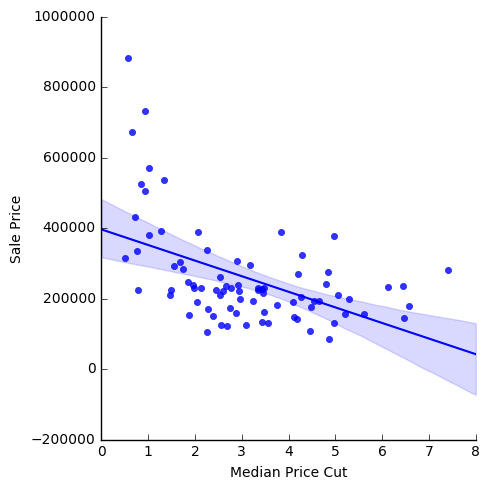

In [22]:
sns.lmplot(x="Median Price Cut", y="Sale Price", data=Q2_2016)

/Users/sglyon/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:898: UserWarning:

axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.



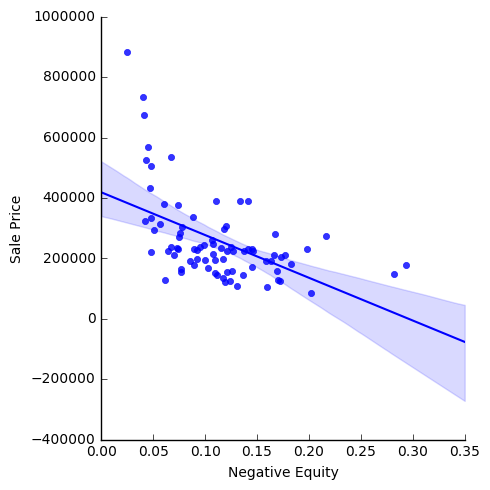

In [23]:
sns.lmplot(x="Negative Equity", y="Sale Price", data=Q2_2016)

/Users/sglyon/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:898: UserWarning:

axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.



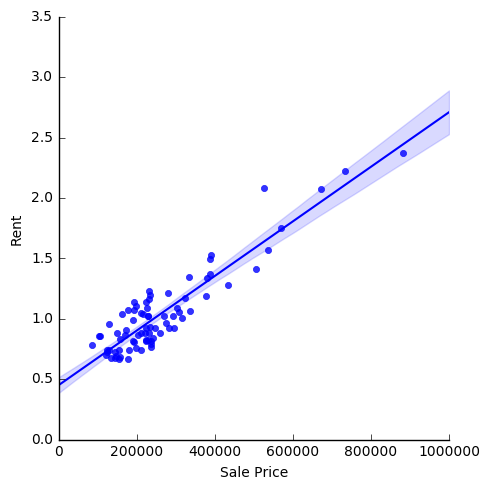

In [24]:
sns.lmplot(x="Sale Price", y="Rent", data=Q2_2016)

/Users/sglyon/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:898: UserWarning:

axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.



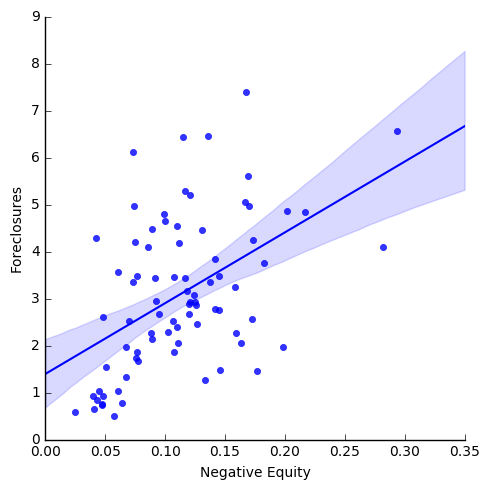

In [25]:
sns.lmplot(x="Negative Equity", y="Foreclosures", data=Q2_2016)

/Users/sglyon/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:898: UserWarning:

axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.



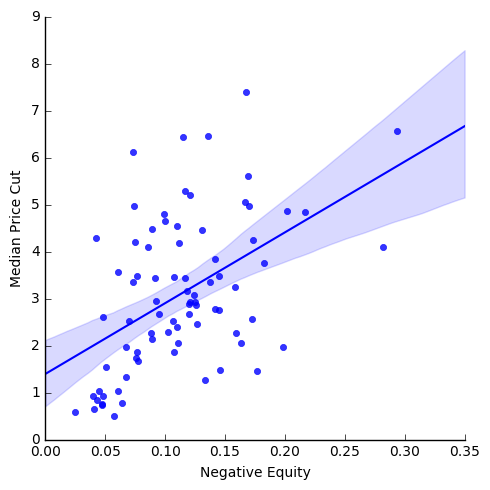

In [26]:
sns.lmplot(x="Negative Equity", y="Median Price Cut", data=Q2_2016)

## Conclusion

The real estate data we analyzed was done on a very macro-level. The takeaway is that a lot of the correlations were based on common sense and micro-foundations. If you really want to understand real estate trends in the long and short term, it helps to understand what happens on the ground. For instance, inventory age is seasonal because parents tend to move during the summer when school is not running. Negative equity rates and foreclosures have a high correlation because homeowners are more likely to walk away when their homes are under value and they owe more on their house than what it is worth. We also found some regional variations which which were apparent in the data, as many of the cities with the largest home price increases were in California or Hawaii. 

Zillow is a great resource for national real estate data, and Python has been a great tool for analyzing this data with dataframes, calculations, and plotting methods.